In [1]:
import pickle
import numpy as np

from dojo.svm import SVR
from dojo.tuning import GridSearch

# Setup Data
from utils.data import fires, FEATURE_NAMES
from utils.visualization import plot_decisions

%matplotlib inline

In [2]:
X, y_log = fires[FEATURE_NAMES], fires["log(area+1)"]

## Parameter Tuning

In [3]:
epsilon_range = np.linspace(0.1, 10, num=100)
gamma_range = np.linspace(0.1, 10, num=10)


In [4]:
svm_model = GridSearch(SVR(), param_grid={
    "epsilon": epsilon_range,
    "gamma": gamma_range,
})

In [5]:
svm_model.fit(X, y_log)

GridSearch(
    model=SVR(
    epsilon=0.01,
    kernel=2,
    degree=3,
    gamma='auto',
    verbose=False,
),
    param_grid={'epsilon': array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,
        1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,
        2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,  3.3,
        3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,  4.4,
        4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,  5.5,
        5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,  6.6,
        6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,  7.7,
        7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,  8.8,
        8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,  9.9,
       10. ]), 'gamma': array([ 0.1,  1.2,  2.3,  3.4,  4.5,  5.6,  6.7,  7.8,  8.9, 10. ])},
    cv_folds=5,
    metric='auto',
    best_model=SVR(
    epsilon=1.0,
    kernel=2,
    degree=3,
    gamma

## Visualize Decisions

/Users/victor/.local/share/virtualenvs/firewall-npje4pOc/lib/python3.6/site-packages/dojo/dimred/pca.py:49: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  eig_pairs[i][1] for i in range(self.n_components)


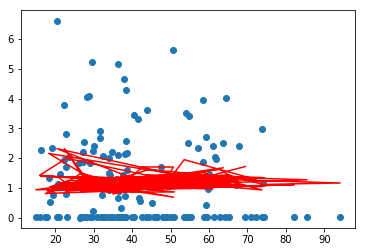

In [6]:
plot_decisions(svm_model.best_model, X, y_log)

## Saving the model

In [8]:
with open("./svm.b", "wb") as f:
    pickle.dump(svm_model.best_model, f)